Passing Data Visualizations


In [1]:
#importing Dependancies
#=========================iii===================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
#loading Rushing data for transformation
#============================================================================================

file_path = Path('cleaned_data/receiving_data.csv')
df = pd.read_csv(file_path)
df

,Unnamed: 0,player,targets,rec,rec_yds,rec_td,rec_long,rec_air_yds,rec_yac,rec_drops
0,0,A.J. Brown,387,240,3943,31,1639,4573.1,1462,21
1,1,A.J. Green,222,111,1427,5,662,2864.9,279,10
2,2,AJ Dillon,61,51,436,2,276,28.5,418,4
3,3,Aaron Brewer,1,0,0,0,0,3.0,0,0
4,4,Aaron Jones,259,198,1591,15,790,309.6,1583,14
...,...,...,...,...,...,...,...,...,...,...
877,877,Zach Zenner,3,2,19,0,19,5.0,19,1
878,878,Zack Moss,62,48,345,2,201,60.8,334,3
879,879,Zander Horvath,7,4,7,2,6,5.0,1,1
880,880,Zay Jones,185,121,1236,4,684,1998.9,415,7


In [3]:
#dropping unnecessary columns
#==================================
df =df.drop(['Unnamed: 0'],axis=1)
df = df.drop(columns=['rec_long'])

df.head()

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops
0,A.J. Brown,387,240,3943,31,4573.1,1462,21
1,A.J. Green,222,111,1427,5,2864.9,279,10
2,AJ Dillon,61,51,436,2,28.5,418,4
3,Aaron Brewer,1,0,0,0,3.0,0,0
4,Aaron Jones,259,198,1591,15,309.6,1583,14


In [4]:
#Create new columns for yards per reception  and yards per target

df['ypr'] = df['rec_yds']/df['rec']
df['ypt'] = df['rec_yds']/df['targets']

df = df.round({'ypr':2,'ypt':2})
df.head()

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops,ypr,ypt
0,A.J. Brown,387,240,3943,31,4573.1,1462,21,16.43,10.19
1,A.J. Green,222,111,1427,5,2864.9,279,10,12.86,6.43
2,AJ Dillon,61,51,436,2,28.5,418,4,8.55,7.15
3,Aaron Brewer,1,0,0,0,3.0,0,0,NaN,0.00
4,Aaron Jones,259,198,1591,15,309.6,1583,14,8.04,6.14


In [5]:
#Declaring Qualified receivers as any player with over 50targets in data set
#===========================================================================================
qualified_receivers = df.loc[df['targets']>50]
qualified_receivers

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops,ypr,ypt
0,A.J. Brown,387,240,3943,31,4573.1,1462,21,16.43,10.19
1,A.J. Green,222,111,1427,5,2864.9,279,10,12.86,6.43
2,AJ Dillon,61,51,436,2,28.5,418,4,8.55,7.15
4,Aaron Jones,259,198,1591,15,309.6,1583,14,8.04,6.14
6,Adam Humphries,147,103,996,4,1127.5,316,5,9.67,6.78
...,...,...,...,...,...,...,...,...,...,...
869,Willie Snead,117,81,899,8,981.1,349,7,11.10,7.68
872,Zach Ertz,387,244,2433,15,3060.0,844,19,9.97,6.29
875,Zach Pascal,226,134,1753,15,2253.9,662,11,13.08,7.76
878,Zack Moss,62,48,345,2,60.8,334,3,7.19,5.56


In [6]:
#Finding top rushers by rushing yards
#=========================================
top_yards = qualified_receivers.nlargest(n=10, columns=['rec_yds'])
top_yards

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops,ypr,ypt
161,Cooper Kupp,584,432,5324,40,4511.4,2466,21,12.32,9.12
807,Travis Kelce,558,408,5146,41,4536.4,2121,27,12.61,9.22
755,Stefon Diggs,546,378,5108,34,6378.0,1465,22,13.51,9.36
848,Tyreek Hill,545,380,5084,38,6260.7,1814,25,13.38,9.33
219,Davante Adams,571,403,4957,43,5477.6,1961,15,12.30,8.68
619,Mike Evans,448,278,4215,42,6090.7,1004,17,15.16,9.41
845,Tyler Lockett,427,313,3962,30,5149.3,1008,11,12.66,9.28
176,D.J. Moore,481,279,3950,15,5545.4,1307,24,14.16,8.21
177,D.K. Metcalf,441,268,3945,35,5766.2,1158,26,14.72,8.95
0,A.J. Brown,387,240,3943,31,4573.1,1462,21,16.43,10.19


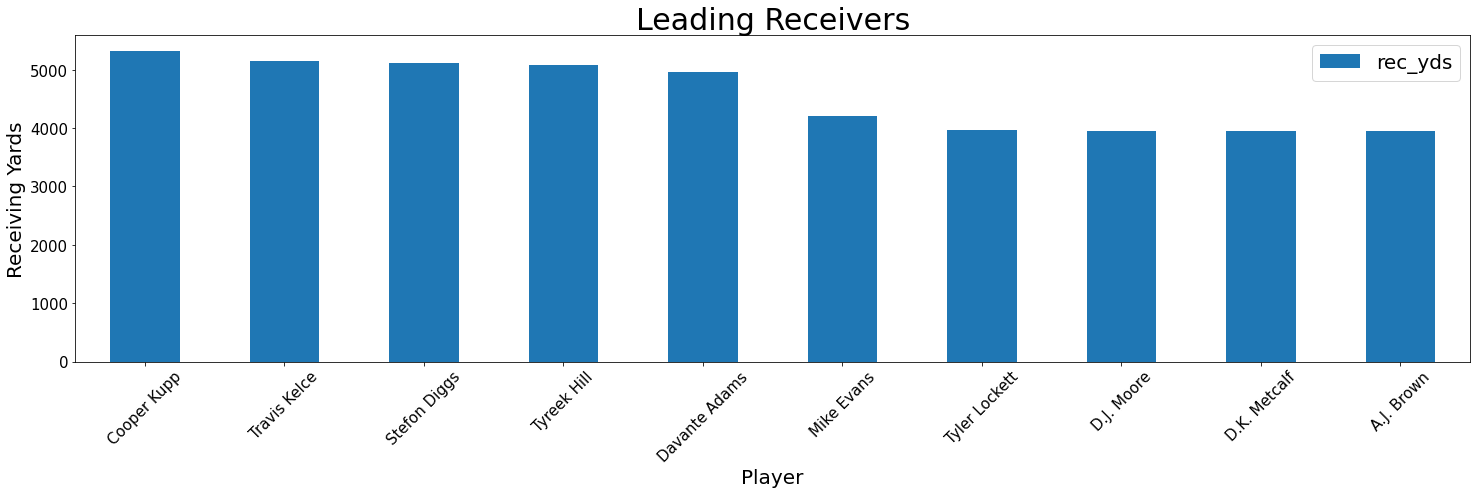

In [7]:
top_yards.plot(x="player",
               y="rec_yds", 
               kind="bar",
               figsize= (25,6),
              title = "Leading Receivers",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Leading Receivers",fontsize = 30)
plt.savefig('Images/Receiving Graphs/Leading Receivers.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Receiving Yards', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [8]:
top_touchdowns = qualified_receivers.nlargest(n=10, columns=['rec_td'])
top_touchdowns

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops,ypr,ypt
219,Davante Adams,571,403,4957,43,5477.6,1961,15,12.30,8.68
619,Mike Evans,448,278,4215,42,6090.7,1004,17,15.16,9.41
807,Travis Kelce,558,408,5146,41,4536.4,2121,27,12.61,9.22
161,Cooper Kupp,584,432,5324,40,4511.4,2466,21,12.32,9.12
848,Tyreek Hill,545,380,5084,38,6260.7,1814,25,13.38,9.33
177,D.K. Metcalf,441,268,3945,35,5766.2,1158,26,14.72,8.95
755,Stefon Diggs,546,378,5108,34,6378.0,1465,22,13.51,9.36
9,Adam Thielen,317,218,2599,32,3384.7,691,10,11.92,8.20
0,A.J. Brown,387,240,3943,31,4573.1,1462,21,16.43,10.19
584,Mark Andrews,427,283,3510,31,4374.6,1108,21,12.40,8.22


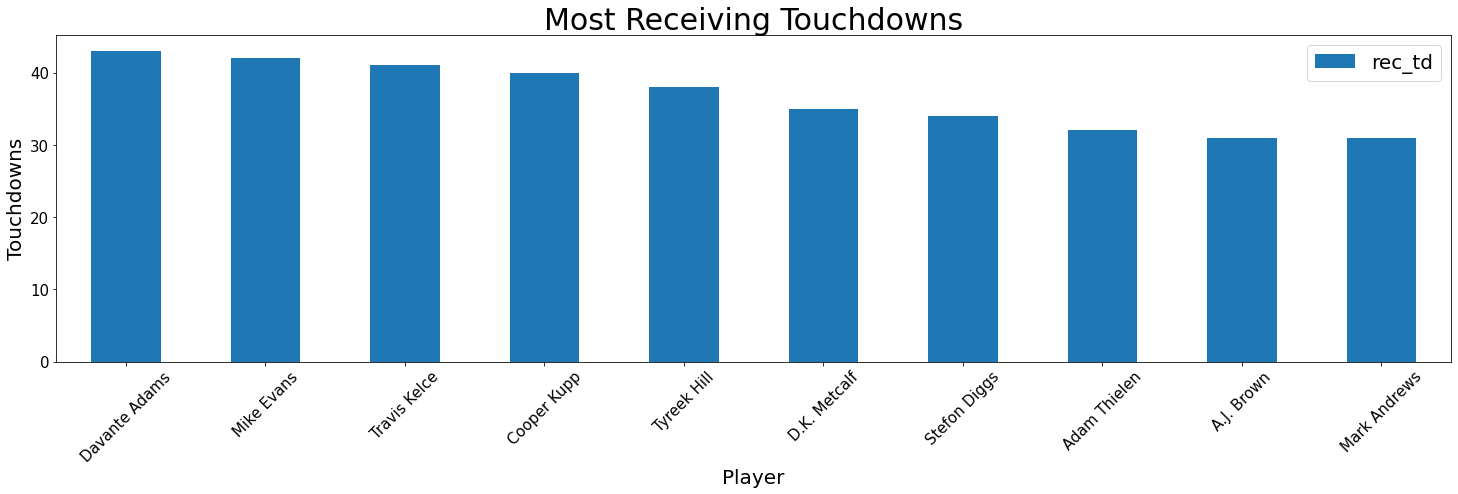

In [9]:
top_touchdowns.plot(x="player",
               y="rec_td", 
               kind="bar",
               figsize= (25,6),
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Most Receiving Touchdowns",fontsize = 30)
plt.savefig('Images/Receiving Graphs/Most Receiving Touchdowns.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Touchdowns', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [10]:
top_ypr = qualified_receivers.nlargest(n=10, columns=['ypr'])
top_ypr

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops,ypr,ypt
239,DeSean Jackson,67,40,831,5,1217.1,245,5,20.78,12.40
318,Gabriel Davis,182,100,1893,22,2724.5,430,13,18.93,10.40
348,Henry Ruggs III,79,50,921,4,1356.5,254,5,18.42,11.66
456,John Ross,83,41,747,4,1272.9,240,10,18.22,9.00
590,Marquez Valdes-Scantling,227,116,2097,12,3794.8,696,12,18.08,9.24
283,Donovan Peoples-Jones,127,80,1349,5,1767.0,303,5,16.86,10.62
392,Jalen Guyton,109,61,1023,6,1588.8,335,9,16.77,9.39
252,Denzel Mims,72,34,570,0,1000.8,207,4,16.76,7.92
89,Breshad Perriman,164,85,1422,11,2418.4,432,6,16.73,8.67
527,Kenny Golladay,230,124,2071,13,3262.4,470,12,16.70,9.00


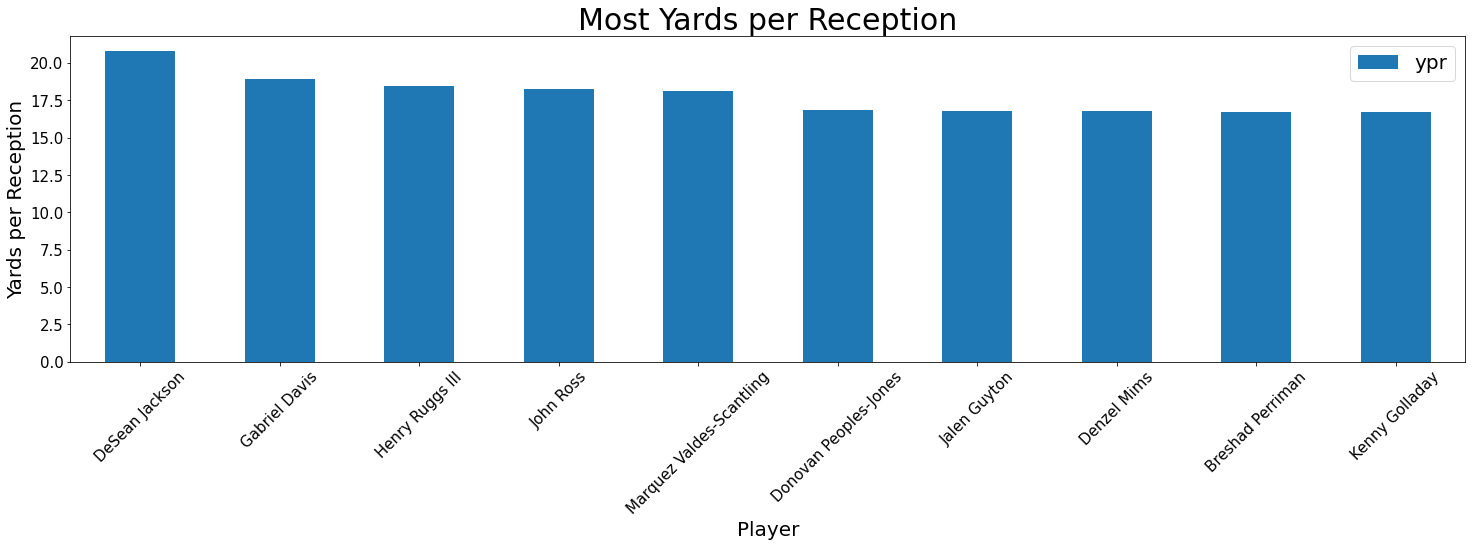

In [11]:
top_ypr.plot(x="player",
               y="ypr", 
               kind="bar",
               figsize= (25,6),
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Most Yards per Reception",fontsize = 30)
plt.savefig('Images/Receiving Graphs/Most Yards per Reception.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Yards per Reception', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [12]:
top_ypt = qualified_receivers.nlargest(n=10, columns=['ypt'])
top_ypt

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops,ypr,ypt
239,DeSean Jackson,67,40,831,5,1217.1,245,5,20.78,12.40
348,Henry Ruggs III,79,50,921,4,1356.5,254,5,18.42,11.66
283,Donovan Peoples-Jones,127,80,1349,5,1767.0,303,5,16.86,10.62
698,Richie James,71,49,750,2,703.1,347,3,15.31,10.56
318,Gabriel Davis,182,100,1893,22,2724.5,430,13,18.93,10.40
493,Justin Jefferson,363,248,3768,19,4075.4,1278,10,15.19,10.38
868,Will Fuller,162,111,1664,11,2179.1,541,8,14.99,10.27
374,Ja'Marr Chase,237,153,2428,20,2615.9,1095,18,15.87,10.24
0,A.J. Brown,387,240,3943,31,4573.1,1462,21,16.43,10.19
244,Deebo Samuel,323,214,3227,13,2113.3,2129,30,15.08,9.99


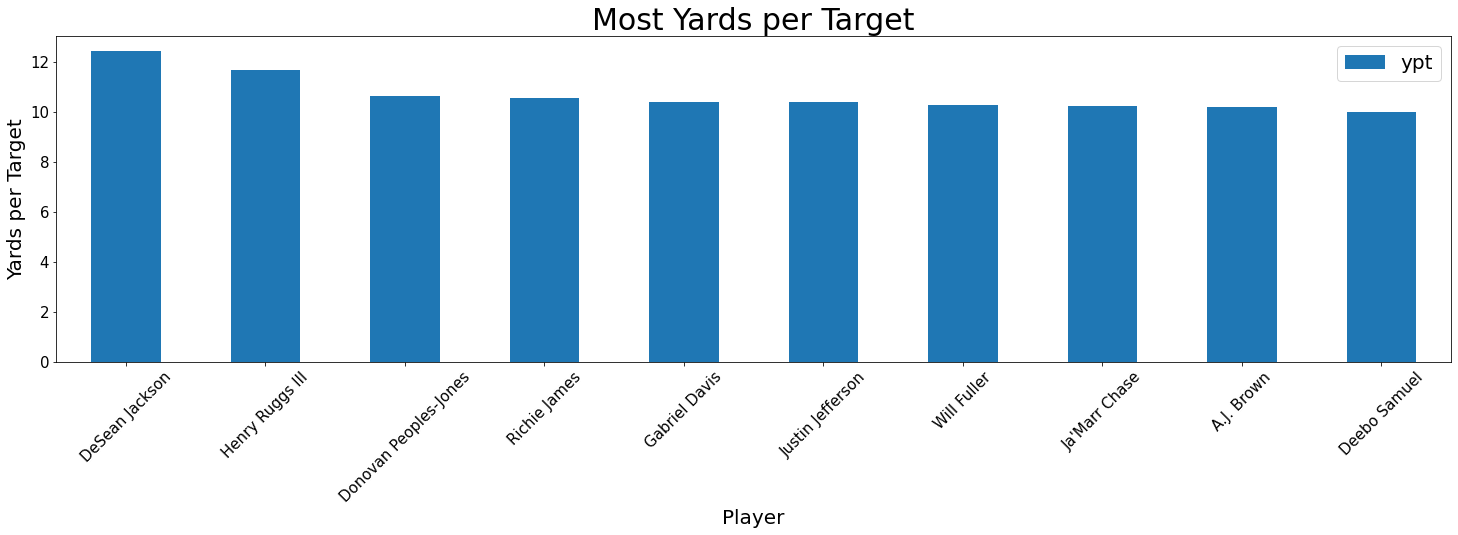

In [13]:
top_ypt.plot(x="player",
               y="ypt", 
               kind="bar",
               figsize= (25,6),
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Most Yards per Target",fontsize = 30)
plt.savefig('Images/Receiving Graphs/Most Yards per Target.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Yards per Target', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [14]:
top_drops = qualified_receivers.nlargest(n=10, columns=['rec_drops'])
top_drops

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops,ypr,ypt
279,Diontae Johnson,507,313,3287,21,4469.7,1347,31,10.50,6.48
244,Deebo Samuel,323,214,3227,13,2113.3,2129,30,15.08,9.99
807,Travis Kelce,558,408,5146,41,4536.4,2121,27,12.61,9.22
27,Alvin Kamara,333,257,2086,13,248.7,2063,26,8.12,6.26
177,D.K. Metcalf,441,268,3945,35,5766.2,1158,26,14.72,8.95
848,Tyreek Hill,545,380,5084,38,6260.7,1814,25,13.38,9.33
176,D.J. Moore,481,279,3950,15,5545.4,1307,24,14.16,8.21
565,Leonard Fournette,303,245,1686,6,29.6,1767,23,6.88,5.56
309,Evan Engram,295,185,1859,8,1870.5,875,22,10.05,6.30
612,Michael Gallup,303,172,2530,14,3588.9,734,22,14.71,8.35


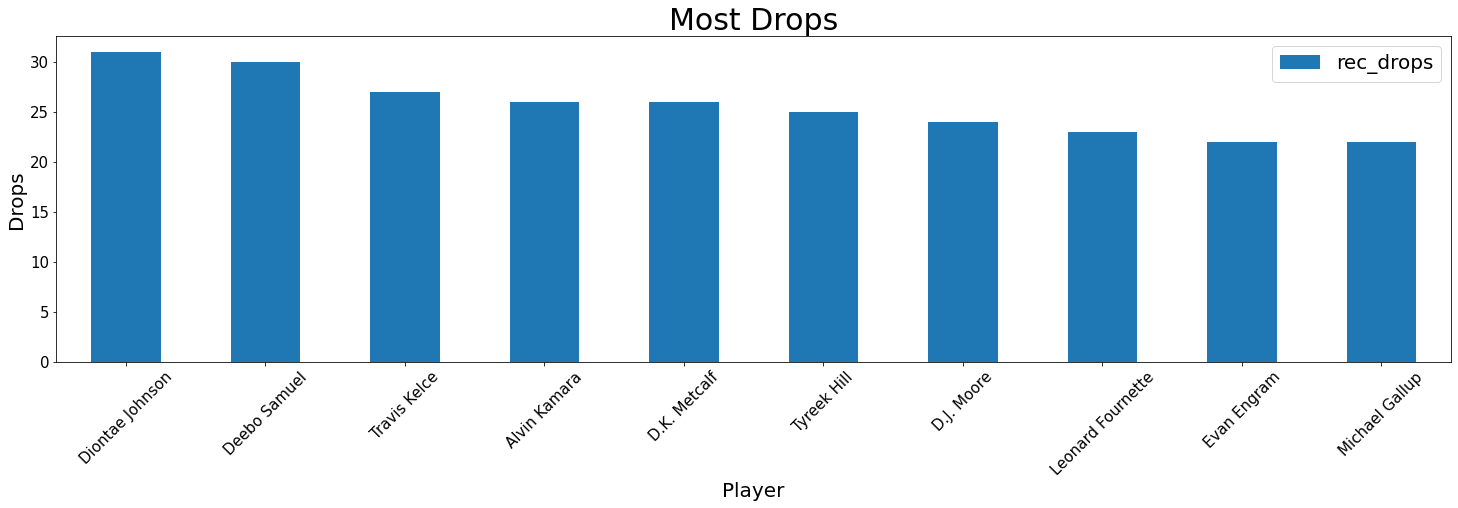

In [15]:
top_drops.plot(x="player",
               y="rec_drops", 
               kind="bar",
               figsize= (25,6),
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Most Drops",fontsize = 30)
plt.savefig('Images/Receiving Graphs/Most Drops.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Drops', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

In [16]:
rec_yac = qualified_receivers.nlargest(n=10, columns=['rec_yac'])
rec_yac

,player,targets,rec,rec_yds,rec_td,rec_air_yds,rec_yac,rec_drops,ypr,ypt
57,Austin Ekeler,328,269,2400,21,174.6,2476,13,8.92,7.32
161,Cooper Kupp,584,432,5324,40,4511.4,2466,21,12.32,9.12
244,Deebo Samuel,323,214,3227,13,2113.3,2129,30,15.08,9.99
807,Travis Kelce,558,408,5146,41,4536.4,2121,27,12.61,9.22
27,Alvin Kamara,333,257,2086,13,248.7,2063,26,8.12,6.26
219,Davante Adams,571,403,4957,43,5477.6,1961,15,12.30,8.68
848,Tyreek Hill,545,380,5084,38,6260.7,1814,25,13.38,9.33
141,Christian McCaffrey,256,213,1853,8,200.2,1778,9,8.70,7.24
565,Leonard Fournette,303,245,1686,6,29.6,1767,23,6.88,5.56
130,Chris Godwin,418,300,3876,22,3703.4,1743,13,12.92,9.27


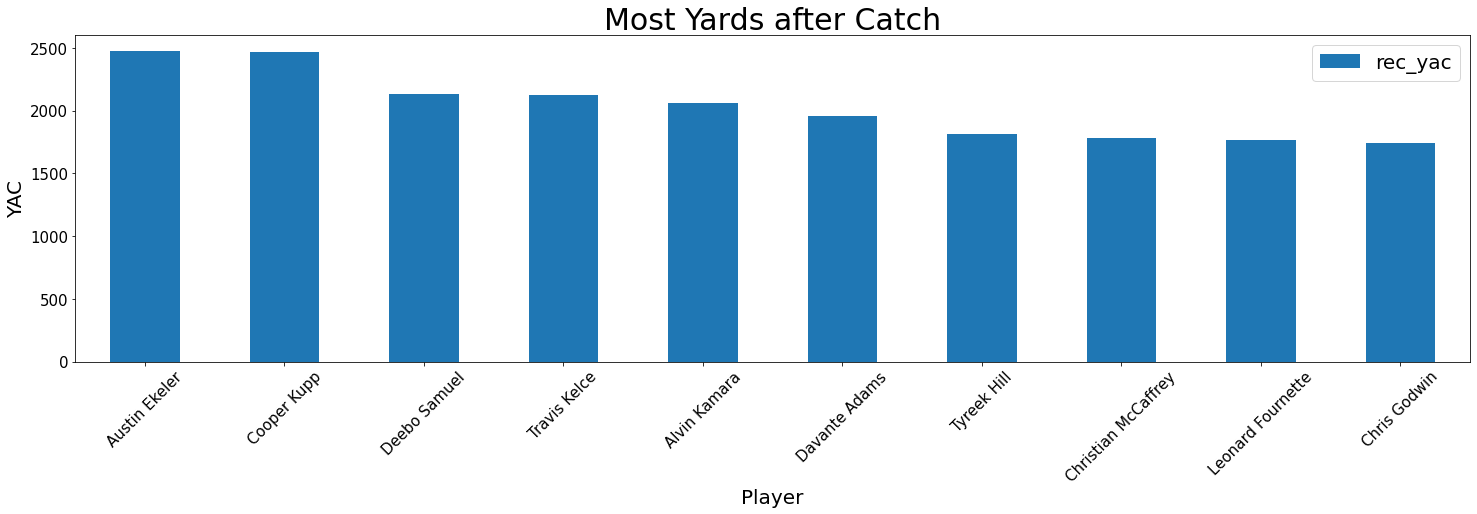

In [17]:
rec_yac.plot(x="player",
               y="rec_yac", 
               kind="bar",
               figsize= (25,6),
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Most Yards after Catch",fontsize = 30)
plt.savefig('Images/Receiving Graphs/Most Yards after Catch.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('YAC', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()